# ML 2 Final Project

About the data set:

[more eda needed]

**ML 2 - Final Project**


*   Arjun Babuji
* Francisca Li
*   Jess Giardina







In [1]:
import pandas as pd
df = pd.read_excel("Online Retail.xlsx")
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [2]:
# prompt: export a csv file that randomly selects different rows in the data frame up to 500 records
df_sample = df.sample(n=500)
df_sample.to_csv('retail_sample.csv')

## Data Cleaning & Prep

In [3]:
# prompt: Remove all the records in the dataframe where there are blanks and then give a count of how many records were dropped from the total data set

df_clean = df.dropna()
dropped_records = len(df) - len(df_clean)
print(f"Number of dropped records: {dropped_records}")


Number of dropped records: 135080


In [4]:
print(len(df_clean))

406829


## Exploratory Analysis

In [5]:
# prompt: count the number of unique customers and number of unique products

unique_customers = df_clean['CustomerID'].nunique()
unique_products = df_clean['StockCode'].nunique()
unique_orders = df_clean['InvoiceNo'].nunique()
unique_countries = df_clean['Country'].nunique()

print(f"Number of unique customers: {unique_customers}")
print(f"Number of unique products: {unique_products}")
print(f"Number of unique orders: {unique_orders}")
print(f"Number of unique countries: {unique_countries}")



Number of unique customers: 4372
Number of unique products: 3684
Number of unique orders: 22190
Number of unique countries: 37


In [6]:
print('Min Invoice Date: ', df_clean['InvoiceDate'].min())
print('Max Invoice Date: ', df_clean['InvoiceDate'].max())
print('Length in Invoice History: ', df_clean['InvoiceDate'].max() - df_clean['InvoiceDate'].min())

Min Invoice Date:  2010-12-01 08:26:00
Max Invoice Date:  2011-12-09 12:50:00
Length in Invoice History:  373 days 04:24:00


/var/folders/b2/md2wh5xd6nxf2ncnmqdwgzlc0000gn/T/ipykernel_4415/934414007.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])
/var/folders/b2/md2wh5xd6nxf2ncnmqdwgzlc0000gn/T/ipykernel_4415/934414007.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Year'] = df_clean['InvoiceDate'].dt.year
/var/folders/b2/md2wh5xd6nxf2ncnmqdwgzlc0000gn/T/ipykernel_4415/934414007.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy 

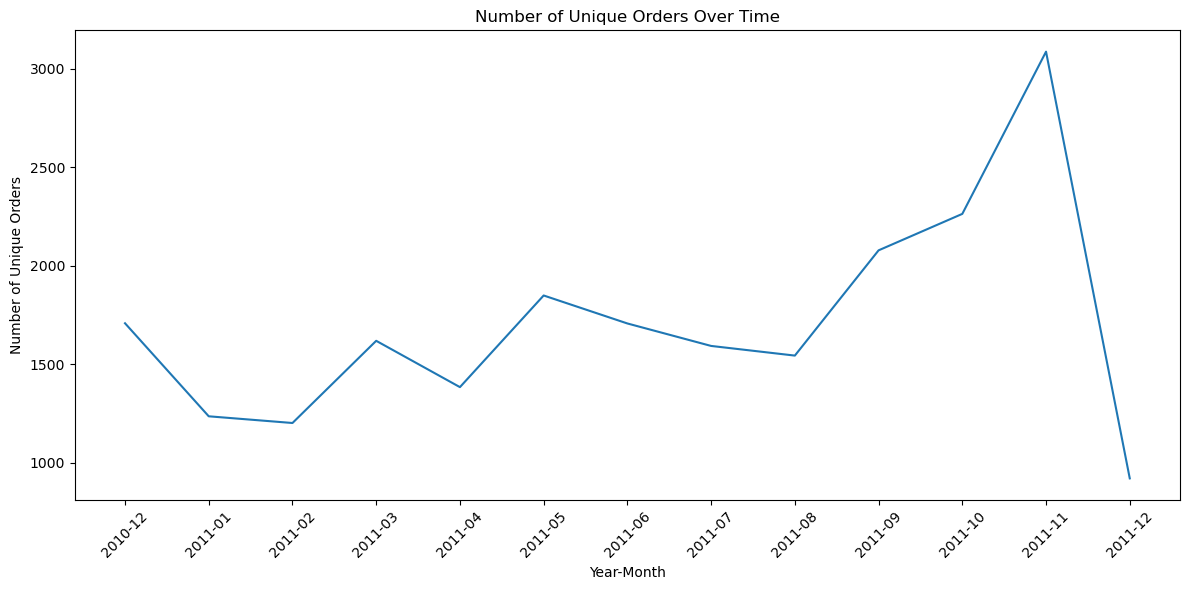

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_clean['InvoiceDate'] is already in datetime format; if not, convert it
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

# Extract the year and month from the InvoiceDate column
df_clean['Year'] = df_clean['InvoiceDate'].dt.year
df_clean['Month'] = df_clean['InvoiceDate'].dt.month
df_clean['YearMonth'] = df_clean['InvoiceDate'].dt.to_period('M')

# Group by year and month and count the number of unique orders
grouped_data = df_clean.groupby('YearMonth')['InvoiceNo'].nunique()

# Reset index to convert the YearMonth PeriodIndex to string in the DataFrame, which will be plotted on the x-axis
grouped_data = grouped_data.reset_index()

# Convert the 'YearMonth' to string if it's in Period format for plotting
grouped_data['YearMonth'] = grouped_data['YearMonth'].astype(str)

# Create a line plot
plt.figure(figsize=(12,6))  # Optional: you can define the figure size
plt.plot(grouped_data['YearMonth'], grouped_data['InvoiceNo'])

# Set the x-axis label
plt.xlabel('Year-Month')

# Set the y-axis label
plt.ylabel('Number of Unique Orders')

# Set the title
plt.title('Number of Unique Orders Over Time')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()


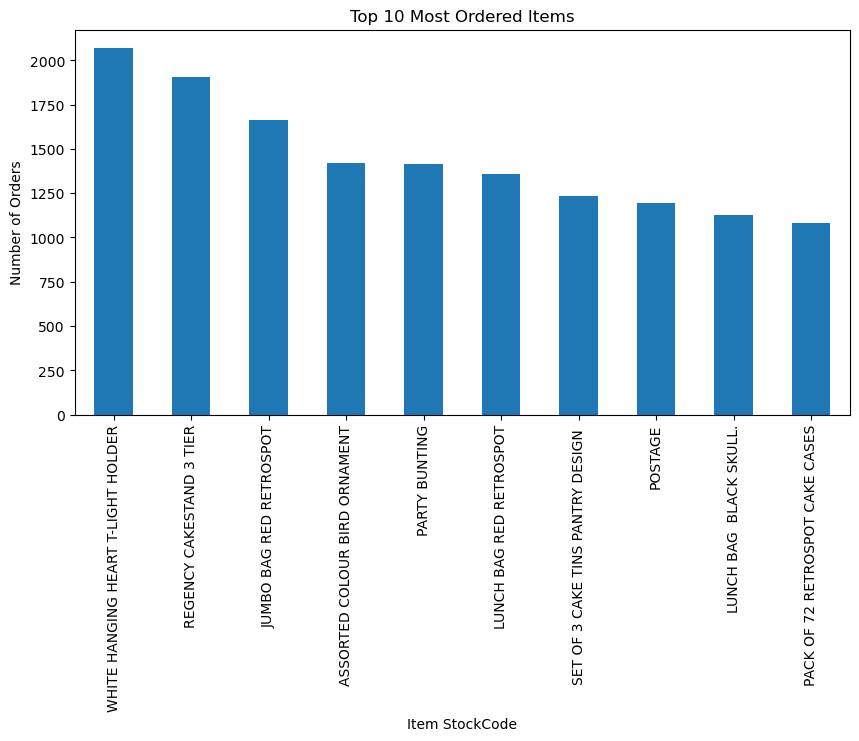

In [8]:
# prompt: Create a bar chart of the top 10 most ordered items

import matplotlib.pyplot as plt

# Get the top 10 most ordered items
top_10_items = df_clean['Description'].value_counts().head(10)

# Create a bar chart of the top 10 most ordered items
plt.figure(figsize=(10, 5))
top_10_items.plot(kind='bar')
plt.title('Top 10 Most Ordered Items')
plt.xlabel('Item StockCode')
plt.ylabel('Number of Orders')
plt.show()


In [9]:
average_units_per_customer = df['Quantity'].mean()

print(f"The average number of units a customer orders is {average_units_per_customer:.2f}")


The average number of units a customer orders is 9.55


In [10]:
# prompt: create a data frame that calculates the total amount of money each customer has spent by multiplying the quantity and the unit price

df_clean['Total_Amount'] = df_clean['Quantity'] * df_clean['UnitPrice']
df_clean.head(3)


/var/folders/b2/md2wh5xd6nxf2ncnmqdwgzlc0000gn/T/ipykernel_4415/3883245929.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Total_Amount'] = df_clean['Quantity'] * df_clean['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,YearMonth,Total_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,2010-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,2010-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,2010-12,22.00


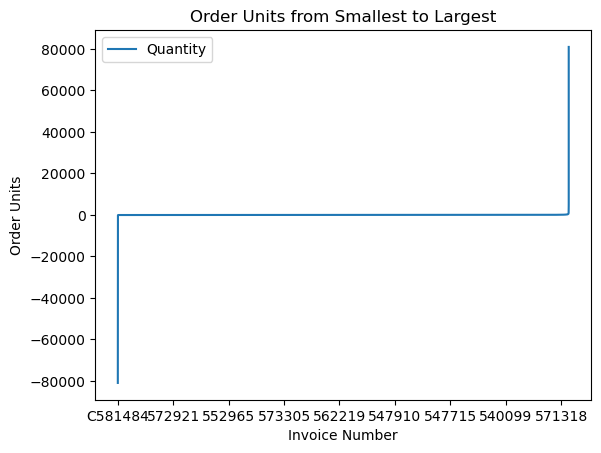

In [11]:
# prompt: plot the order units from smallest to largest

df_clean.sort_values(by='Quantity', ascending=True).plot(x='InvoiceNo', y='Quantity', kind='line')
plt.xlabel('Invoice Number')
plt.ylabel('Order Units')
plt.title('Order Units from Smallest to Largest')
plt.show()


## Feature Engineering

In [12]:
# Flag instances where Quantity is negative (returned or canceled orders)
df_clean['Returned'] = (df_clean['Quantity'] <= 0).astype(int)
df_clean.head(3)

/var/folders/b2/md2wh5xd6nxf2ncnmqdwgzlc0000gn/T/ipykernel_4415/2382794382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Returned'] = (df_clean['Quantity'] <= 0).astype(int)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,YearMonth,Total_Amount,Returned
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,2010-12,15.30,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,2010-12,20.34,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,2010-12,22.00,0


In [13]:
# Convert InvoiceDate to datetime
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

# Check if a customer has purchased more than once
customer_purchases = df_clean.groupby('CustomerID')['InvoiceNo'].nunique()
df_clean['MultiplePurchases'] = df_clean['CustomerID'].map(customer_purchases) > 1
df_clean.head(3)

df_clean[df_clean['MultiplePurchases']== False]

/var/folders/b2/md2wh5xd6nxf2ncnmqdwgzlc0000gn/T/ipykernel_4415/569109531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])
/var/folders/b2/md2wh5xd6nxf2ncnmqdwgzlc0000gn/T/ipykernel_4415/569109531.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['MultiplePurchases'] = df_clean['CustomerID'].map(customer_purchases) > 1


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,YearMonth,Total_Amount,Returned,MultiplePurchases
155,536384,82484,WOOD BLACK BOARD ANT WHITE FINISH,3,2010-12-01 09:53:00,6.45,18074.0,United Kingdom,2010,12,2010-12,19.35,0,False
156,536384,84755,COLOUR GLASS T-LIGHT HOLDER HANGING,48,2010-12-01 09:53:00,0.65,18074.0,United Kingdom,2010,12,2010-12,31.20,0,False
157,536384,22464,HANGING METAL HEART LANTERN,12,2010-12-01 09:53:00,1.65,18074.0,United Kingdom,2010,12,2010-12,19.80,0,False
158,536384,21324,HANGING MEDINA LANTERN SMALL,6,2010-12-01 09:53:00,2.95,18074.0,United Kingdom,2010,12,2010-12,17.70,0,False
159,536384,22457,NATURAL SLATE HEART CHALKBOARD,12,2010-12-01 09:53:00,2.95,18074.0,United Kingdom,2010,12,2010-12,35.40,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541801,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09 12:16:00,1.25,12713.0,Germany,2011,12,2011-12,15.00,0,False
541802,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09 12:16:00,0.85,12713.0,Germany,2011,12,2011-12,10.20,0,False
541803,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09 12:16:00,0.85,12713.0,Germany,2011,12,2011-12,10.20,0,False
541804,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09 12:16:00,2.08,12713.0,Germany,2011,12,2011-12,24.96,0,False


In [14]:
# Create a new DataFrame to hold aggregated features
customer_data = df_clean.groupby('CustomerID').agg({
    'InvoiceNo': pd.Series.nunique,
    'StockCode': pd.Series.nunique,
    'UnitPrice': lambda x: sum(x * df_clean.loc[x.index, 'Quantity']),  # Total spend
    'Quantity': 'sum'  # Total items purchased
}).rename(columns={
    'InvoiceNo': 'TotalOrders',
    'StockCode': 'UniqueItemsBought',
    'UnitPrice': 'LifetimeSpend',
    'Quantity': 'TotalItemsPurchased'
})

# Calculate average order value if customer had more than 1 order
customer_data['AvgOrderValue'] = customer_data.apply(
    lambda x: x['LifetimeSpend'] / x['TotalOrders'] if x['TotalOrders'] > 1 else x['LifetimeSpend'], axis=1
)

# Add a flag for returned orders per customer
customer_data['HasReturned'] = df_clean.groupby('CustomerID')['Returned'].max()

customer_data.head()

,TotalOrders,UniqueItemsBought,LifetimeSpend,TotalItemsPurchased,AvgOrderValue,HasReturned
CustomerID,,,,,,
12346.0,2,1,0.00,0,0.000000,1
12347.0,7,103,4310.00,2458,615.714286,0
12348.0,4,22,1797.24,2341,449.310000,0
12349.0,1,73,1757.55,631,1757.550000,0
12350.0,1,17,334.40,197,334.400000,0


In [15]:
customer_data['RepurchasedFlag'] = customer_data['TotalOrders'] > 1

In [16]:
customer_data.head(3)

,TotalOrders,UniqueItemsBought,LifetimeSpend,TotalItemsPurchased,AvgOrderValue,HasReturned,RepurchasedFlag
CustomerID,,,,,,,
12346.0,2,1,0.00,0,0.000000,1,True
12347.0,7,103,4310.00,2458,615.714286,0,True
12348.0,4,22,1797.24,2341,449.310000,0,True


## Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler

# Select the features to scale
features_to_scale = ['Quantity', 'UnitPrice', 'Total_Amount']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the features and transform
df_clean[features_to_scale] = scaler.fit_transform(df_clean[features_to_scale])

# Display the first few rows to confirm scaling
print(df_clean[features_to_scale].head())


   Quantity  UnitPrice  Total_Amount
0 -0.024373  -0.013135     -0.011932
1 -0.024373  -0.001017     -0.000145
2 -0.016331  -0.010250      0.003738
3 -0.024373  -0.001017     -0.000145
4 -0.024373  -0.001017     -0.000145


/var/folders/b2/md2wh5xd6nxf2ncnmqdwgzlc0000gn/T/ipykernel_4415/774730286.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[features_to_scale] = scaler.fit_transform(df_clean[features_to_scale])


In [18]:
## Experimenting with Models 

In [19]:
## Initial Setup and Data Preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_excel("Online Retail.xlsx")

# Ensure the DataFrame is a separate copy after dropping missing values
df_clean = df.dropna().copy()

# Adding the Total_Amount feature by multiplying Quantity and UnitPrice
df_clean['Total_Amount'] = df_clean['Quantity'] * df_clean['UnitPrice']

# Create 'MultiplePurchases' and 'IsReturnCustomer' columns
if 'CustomerID' in df_clean.columns and 'InvoiceNo' in df_clean.columns:
    customer_orders = df_clean.groupby('CustomerID')['InvoiceNo'].nunique()
    df_clean['MultiplePurchases'] = df_clean['CustomerID'].map(customer_orders)
    df_clean['IsReturnCustomer'] = (df_clean['MultiplePurchases'] > 1).astype(int)
else:
    print("Required columns are missing!")

# Select numeric columns only for model input
numeric_cols = df_clean.select_dtypes(include=['number']).columns.tolist()
X = df_clean[numeric_cols].drop('IsReturnCustomer', axis=1, errors='ignore')
y = df_clean['IsReturnCustomer']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
## KNN Model Training and Eval
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score

# KNN Model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluate KNN
print("KNN performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(f"Precision: {precision_score(y_test, y_pred_knn)}")
print(f"Recall: {recall_score(y_test, y_pred_knn)}")
print(f"F1 Score: {f1_score(y_test, y_pred_knn)}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_knn)}")

cv_scores_knn = cross_val_score(knn, X, y, cv=5)
print("KNN Cross-validation scores:", cv_scores_knn.mean())


KNN performance:
Accuracy: 0.9794385861416316
Precision: 0.9846301003695065
Recall: 0.993390177804217
F1 Score: 0.9889907411672578
ROC AUC: 0.8941780464270167
KNN Cross-validation scores: 0.9314355541121463


In [21]:
## Random Forest Model Training and Eval
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
rf = RandomForestClassifier(n_estimators=100, max_depth=10)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate Random Forest
print("Random Forest performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Precision: {precision_score(y_test, y_pred_rf)}")
print(f"Recall: {recall_score(y_test, y_pred_rf)}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf)}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_rf)}")

cv_scores_rf = cross_val_score(rf, X, y, cv=5)
print("Random Forest Cross-validation scores:", cv_scores_rf.mean())


Random Forest performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC: 1.0
Random Forest Cross-validation scores: 1.0


In [22]:
## Logistic Regression Model Training and Eval
from sklearn.linear_model import LogisticRegression

# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

# Evaluate Logistic Regression
print("Logistic Regression performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(f"Precision: {precision_score(y_test, y_pred_lr)}")
print(f"Recall: {recall_score(y_test, y_pred_lr)}")
print(f"F1 Score: {f1_score(y_test, y_pred_lr)}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_lr)}")

cv_scores_lr = cross_val_score(log_reg, X, y, cv=5)
print("Logistic Regression Cross-validation scores:", cv_scores_lr.mean())


Logistic Regression performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC: 1.0
Logistic Regression Cross-validation scores: 0.9999926258521235


In [24]:
## Tuning KNN Classifier
from sklearn.model_selection import train_test_split

# Create a smaller sample to speed up the GridSearch
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=0.1, random_state=42)  # Adjust train_size to control the sample size

# Now you can proceed with your GridSearch as you have it set up
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn = KNeighborsClassifier()

# First Grid Search to find the best 'n_neighbors'
param_grid_neighbors = {
    'n_neighbors': [3, 5, 7, 10]
}
grid_search_neighbors = GridSearchCV(estimator=knn, param_grid=param_grid_neighbors, cv=3, verbose=2, scoring='accuracy', n_jobs=-1)
grid_search_neighbors.fit(X_train_sample, y_train_sample)
best_n_neighbors = grid_search_neighbors.best_params_['n_neighbors']
print("Optimal n_neighbors:", best_n_neighbors)

# Second Grid Search to optimize 'weights' and 'metric' with the best 'n_neighbors'
param_grid_weights_metric = {
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_optimized_neighbors = KNeighborsClassifier(n_neighbors=best_n_neighbors)
grid_search_wm = GridSearchCV(estimator=knn_optimized_neighbors, param_grid=param_grid_weights_metric, cv=3, verbose=2, scoring='accuracy', n_jobs=-1)
grid_search_wm.fit(X_train_sample, y_train_sample)

# Output the best parameters and their scores
print("Best weights and metric:", grid_search_wm.best_params_)
print("Best score with optimized weights and metric:", grid_search_wm.best_score_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Optimal n_neighbors: 3
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best weights and metric: {'metric': 'manhattan', 'weights': 'distance'}
Best score with optimized weights and metric: 0.9576599000283955


In [25]:
## Tuning Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],  # number of trees
    'max_depth': [10, 20, 30],  # depth of trees
    'min_samples_split': [2, 5, 10]  # minimum number of samples required to split a node
}

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=2, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best score for Random Forest:", grid_search_rf.best_score_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   5.0s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   4.9s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   4.7s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   4.5s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   4.8s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   9.3s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   9.7s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   8.6s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   9.0s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   9.3s
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time=  14.1s
[CV] END max_depth=10, min_samples_split=2, n_e

In [26]:
## Advanced Model Evaluation through K-Fold Cross-Validation
from sklearn.model_selection import cross_validate
import numpy as np

# Assuming knn, rf, and log_reg are already defined and optimized

models = {
    'KNN': knn_optimized_neighbors,
    'Random Forest': rf,
    'Logistic Regression': log_reg  # Assuming log_reg is your optimized Logistic Regression model
}

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
for name, model in models.items():
    cv_results = cross_validate(model, X, y, cv=5, scoring=scoring, return_train_score=False)
    print(f"{name} CV Metrics:")
    for score in scoring:
        mean_score = np.mean(cv_results[f'test_{score}'])
        print(f"Average {score}: {mean_score}")

KNN CV Metrics:
Average accuracy: 0.9314355541121463
Average precision: 0.9499678197235415
Average recall: 0.9777018681986103
Average f1: 0.9636299608074921
Average roc_auc: 0.7035538529813952
Random Forest CV Metrics:
Average accuracy: 1.0
Average precision: 1.0
Average recall: 1.0
Average f1: 1.0
Average roc_auc: 1.0
Logistic Regression CV Metrics:
Average accuracy: 0.9999926258521235
Average precision: 0.9999973545673395
Average recall: 0.99999470916967
Average f1: 0.9999960318597572
Average roc_auc: 0.9999917176227937


KNN Confusion Matrix:


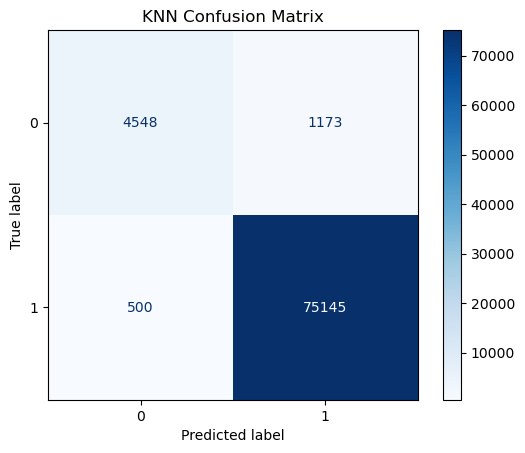

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.79      0.84      5721
           1       0.98      0.99      0.99     75645

    accuracy                           0.98     81366
   macro avg       0.94      0.89      0.92     81366
weighted avg       0.98      0.98      0.98     81366

Random Forest Confusion Matrix:


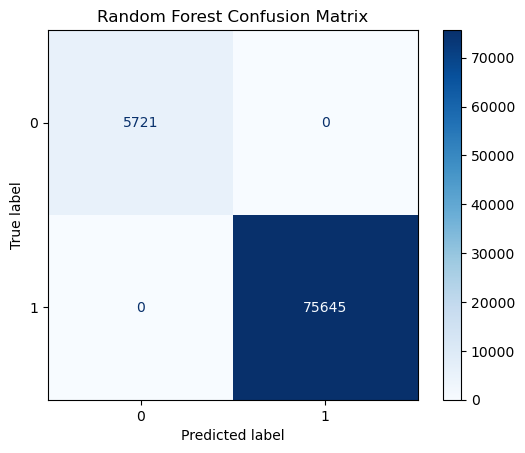

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5721
           1       1.00      1.00      1.00     75645

    accuracy                           1.00     81366
   macro avg       1.00      1.00      1.00     81366
weighted avg       1.00      1.00      1.00     81366

Logistic Regression Confusion Matrix:


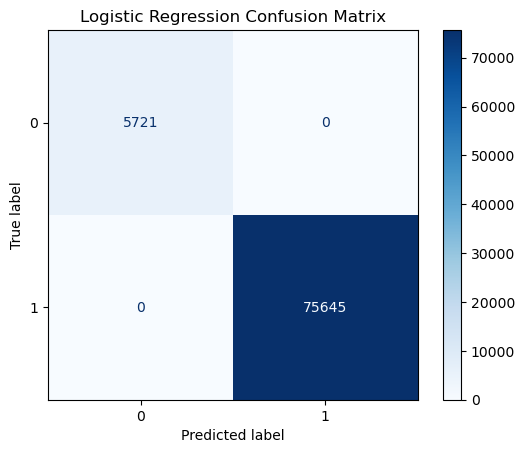

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5721
           1       1.00      1.00      1.00     75645

    accuracy                           1.00     81366
   macro avg       1.00      1.00      1.00     81366
weighted avg       1.00      1.00      1.00     81366



In [28]:
## Confusion Matrix and Other Metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Fit models on the entire training data and evaluate on the test data
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Display the confusion matrix using a plot for better visualization
    print(f"{name} Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'{name} Confusion Matrix')
    plt.show()
    
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))

In [30]:
## Model Selection
# Decide based on the performance which model is the simplest and best-performing

# First, create a dictionary to hold your models' cross-validation scores
cv_scores = {
    'KNN': cv_scores_knn.mean(),
    'Random Forest': cv_scores_rf.mean(),
    'Logistic Regression': cv_scores_lr.mean()
}

# Now you can find the best model based on CV scores
best_model_name = max(cv_scores, key=cv_scores.get)
print(f"The best performing model is: {best_model_name}")

# Access the best model from the models dictionary
best_model = models[best_model_name]

# Here you can add the code to save, serialize, or deploy the best model.

The best performing model is: Random Forest
